Illustration of the Glivenko-Cantelli Theorem
---

In [1]:
import pandas as pd
from pandas import DataFrame, Series
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy.random as rd
import seaborn as sns
from scipy.stats import cumfreq
from scipy.stats import norm
sns.set();

### Generate the random sample

In [2]:
n = 100000 ## size of the random sample
nbBins = 200
xx = rd.normal(0.,1., n)
data = pd.DataFrame(xx, columns=['X'])
vals = data['X'].values
uu = np.linspace(np.min(data['X']), np.max(data['X']), nbBins) ## bins

### Plot the empirical CDF

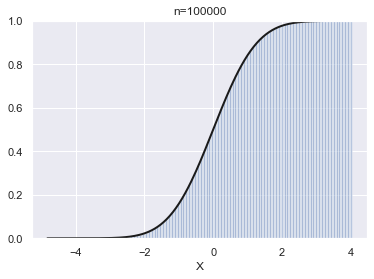

In [9]:
sns.distplot(data['X'], bins=uu, hist_kws={'cumulative': True, 'weights': np.full(n, 1./n)}, kde=False, kde_kws={'cumulative': True});
plt.ylim(0., 1.)
plt.plot(uu, norm.cdf(uu), 'k', linewidth=2)
plt.title("n=%s" %n)
plt.show()

### Empirical density

In [10]:
def gaussianDensity(x): return np.exp(-0.5*x*x)/np.sqrt(2.*np.pi) ## Gaussian density

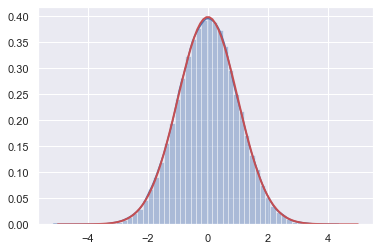

In [11]:
xx = np.linspace(-5., 5., 100)
sns.distplot(data['X'].values, kde=True, kde_kws={'cumulative': False})
plt.plot(xx, gaussianDensity(xx), 'r', linewidth=2)
plt.show()

# Convergence of the mean

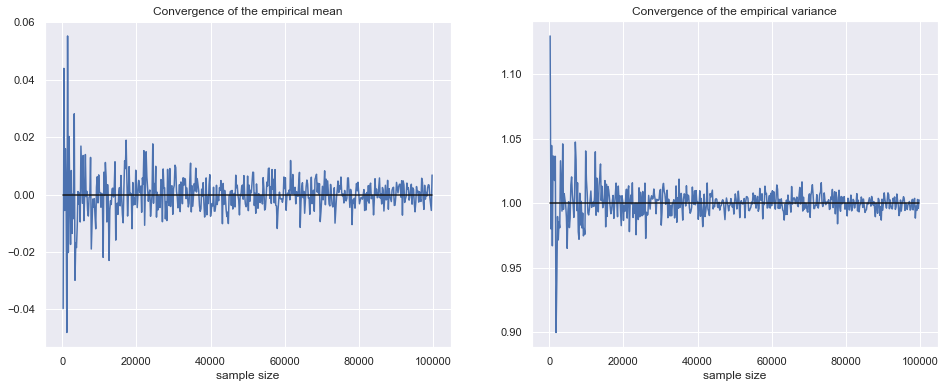

In [16]:
nn = 200*np.arange(1,500)
means = [np.mean(rd.normal(0.,1., n)) for n in nn]
var2s = [np.var(rd.normal(0.,1., n)) for n in nn]

plt.figure(figsize=(16, 6))
plt.subplot(1,2,1)
plt.plot(nn, means, 'b')
plt.plot(nn, [0. for _ in nn], 'k')
plt.title("Convergence of the empirical mean")
plt.xlabel('sample size')

plt.subplot(1,2,2)
plt.plot(nn, var2s, 'b')
plt.plot(nn, [1. for _ in nn], 'k')
plt.title("Convergence of the empirical variance")
plt.xlabel('sample size')
plt.show()